# Uge 9b: Integration af vektorfelter: Kurveintegralet og Flux

Demo af Christian Mikkelstrup, Hans Henrik Hermansen, Jakob Lemvig, Karl Johan Måstrup Kristensen og Magnus Troen

In [1]:
from sympy import *
from dtumathtools import *

init_printing()

## Kort intro til vektorfelter i SymPy

Generelt når vi arbjede med vektorfelter i `SymPy` er det oftest nemmest at definere dem som lambda-/pythonfunktioner, da vi ofte skal indsætte en vektorfunktion i $\pmb{V}$

In [2]:
x, y, z = symbols("x,y,z", real=True)

V = lambda x, y, z: Matrix([y * cos(x), y * sin(x), z])
V(x, y, z)

⎡y⋅cos(x)⎤
⎢        ⎥
⎢y⋅sin(x)⎥
⎢        ⎥
⎣   z    ⎦

Hvis vi fx har et udtryk for en parameterfunktion

\begin{equation*}
\boldsymbol{r}_t = \begin{bmatrix} r_1(t) \\ r_2(t) \\ r_3(t) \end{bmatrix}
\end{equation*}

kan vi nemt indsætte $\boldsymbol{r}_t$ i $V$ ved:

In [3]:
r1, r2, r3 = symbols("r1,r2,r3", cls=Function)
t = symbols("t")
r = Matrix([r1(t), r2(t), r3(t)])

# r indsat i V
V(*r)

⎡r₂(t)⋅cos(r₁(t))⎤
⎢                ⎥
⎢r₂(t)⋅sin(r₁(t))⎥
⎢                ⎥
⎣     r₃(t)      ⎦

Hvis vi vil anvende $\pmb{V}$, analytisk kan vi bare indsætte symbolske variable. I senere/andre kurser eller i projektperioden i dette kursus, kan man få brug for at udregne fx rotationen og divergensen af et vektorfelt. Dette gøres nemt med `dtumathtools`:

In [4]:
rotV = dtutools.rot(V(x, y, z), (x, y, z))
rotV

⎡        0        ⎤
⎢                 ⎥
⎢        0        ⎥
⎢                 ⎥
⎣y⋅cos(x) - cos(x)⎦

In [5]:
divV = dtutools.div(V(x, y, z), (x, y, z))
divV

Hvis man skal lave tilpas mange analytiske beregninger på $\pmb{V}$, kan det dog vise sig at være mest optimalt bare at definere $\pmb{V}$ som et SymPy objekt i stedet, og bruge SymPy's $\verb|.subs()|$ til indsætte variable:

In [6]:
V = Matrix([y * cos(x), y * sin(x), z])
V

⎡y⋅cos(x)⎤
⎢        ⎥
⎢y⋅sin(x)⎥
⎢        ⎥
⎣   z    ⎦

## Kurveintegral af vektorfelter (tangentielt kurveintegral)

Vi betragter vektorfeltet 
\begin{equation*}
\pmb{V}(x,y,z) = \begin{bmatrix} -y \\ x \\ 2z \end{bmatrix}
\end{equation*}
samt to kurver $K_1$ og $K_2$ med parameterfremstillingerne
\begin{equation*}
r_1(u) = \begin{bmatrix} \cos(u) \\ \sin(u) \\ \frac{u}{2} \end{bmatrix}
\end{equation*}
\begin{equation*}
r_2(u) = \begin{bmatrix} 1 \\ 0 \\ \frac{u}{2} \end{bmatrix},
\end{equation*}
hvor $u \in [0,4\pi]$.

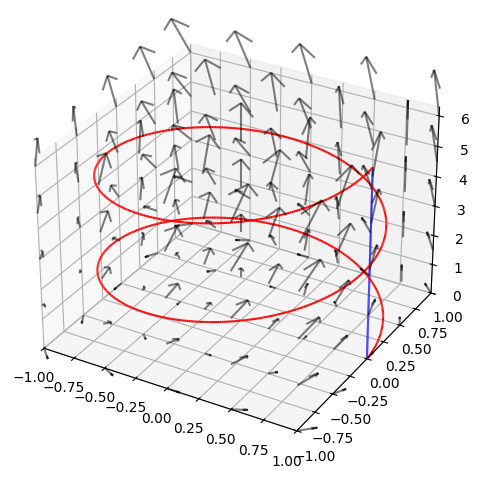

In [7]:
x, y, z, u = symbols("x y z u", real=True)
r1 = Matrix([cos(u), sin(u), u / 2])
r2 = Matrix([1, 0, u / 2])
V = Matrix([-y, x, 2 * z])
u_range = (u, 0, 4 * pi)

K1 = dtuplot.plot3d_parametric_line(
    *r1, u_range, show=False, rendering_kw={"color": "red"}, colorbar=False
)
K2 = dtuplot.plot3d_parametric_line(
    *r2, u_range, show=False, rendering_kw={"color": "blue"}, colorbar=False
)
vektorfelt_V = dtuplot.plot_vector(
    V,
    (x, -1, 1),
    (y, -1, 1),
    (z, 0, 6),
    n=5,
    quiver_kw={"alpha": 0.5, "length": 0.1, "color": "black"},
    colorbar=False,
    show=False,
)

combined = K1 + K2 + vektorfelt_V
combined.legend = False
combined.show()

Vi vil udrenge det tangentielle kurveintegral af $\pmb{V}$ langs hver af de to kurver fra punktet $a = (1,0,0)$ til $b = (1,0,2\pi)$. Dette svarer for begge til $u \in [0,4\pi]$.  Først finder vi tangentvektorene:

In [8]:
r1d = r1.diff(u)
r2d = r2.diff(u)
r1d, r2d

⎛⎡-sin(u)⎤  ⎡ 0 ⎤⎞
⎜⎢       ⎥  ⎢   ⎥⎟
⎜⎢cos(u) ⎥, ⎢ 0 ⎥⎟
⎜⎢       ⎥  ⎢   ⎥⎟
⎝⎣  1/2  ⎦  ⎣1/2⎦⎠

Funktionerne der skal integreres er i følge sætningen:

In [9]:
integrand1 = V.subs({x: r1[0], y: r1[1], z: r1[2]}).dot(r1d)
integrand2 = V.subs({x: r2[0], y: r2[1], z: r2[2]}).dot(r2d)
integrand1.simplify(), integrand2.simplify()

**Det tangentielle integral af $f$ langs kurven $K_1$ er da**
\begin{equation*}
\int_{K_1} \pmb{V} \cdot \mathrm{d}\pmb{s} = \int_0^{4\pi} \frac{u}{2} + 1 \,\mathrm{d}u
\end{equation*}

In [10]:
integrate(integrand1, (u, 0, 4 * pi))

**Det tangentielle integral af $f$ langs kurven $K_2$ er da**
\begin{equation*}
\int_{K_2} \pmb{V} \cdot \mathrm{d}\pmb{s} = \int_0^{4\pi} \frac{u}{2} \,\mathrm{d}u
\end{equation*}

In [11]:
integrate(integrand2, (u, 0, 4 * pi))

### Perspektivering:

Hvis vi opfatter $\pmb{V}$ som et kraft-vektorfelt , er det  arbejde $\pmb{V}$ bidrager med når partiklen flyttes langs den lodrette linje, $4\pi$ mindre end når partiklen flyttes langs spiralkurven. Arbejdets størrelse er altså i dette eksempel afhængig af transportvejen. $\pmb{V}$ kan derfor ikke være et gradient-vektorfelt.

## Søgning efter stamfunktion via trappelinjer. Teori

En stamfunktion til et glat vektorfelt $\pmb{V}$ kan, hvis en stamfunktion findes, bestemmes ved det tangentielle kurveintegral af $\pmb{V}$ langs en vilkårlig kurve fra origo $\pmb{x}_0 = (0,0,0)$ til et vilkårligt fast punkt $\pmb{x} = (x, y, z)$. De nemmeste udregninger får man ved som kurve at benytte trappelinjen fra Origo til $P$.

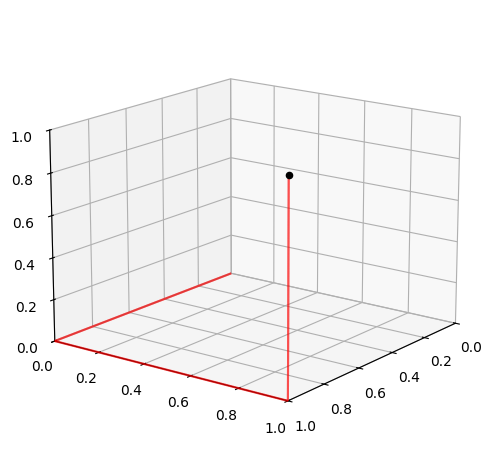

In [12]:
u_range = (u, 0, 1)
r1 = dtuplot.plot3d_parametric_line(
    u, 0, 0, u_range, show=False, rendering_kw={"color": "red"}, colorbar=False
)
r2 = dtuplot.plot3d_parametric_line(
    1, u, 0, u_range, show=False, rendering_kw={"color": "red"}, colorbar=False
)
r3 = dtuplot.plot3d_parametric_line(
    1, 1, u, u_range, show=False, rendering_kw={"color": "red"}, colorbar=False
)
xyz = dtuplot.scatter(Matrix([1, 1, 1]), show=False, rendering_kw={"color": "black"})
combined = r1 + r2 + r3 + xyz
combined.legend = False
combined.camera = {"azim": 37, "elev": 16}

combined.show()

Vist på plottet ovenfor er de tre trappelinjer, som metoden består af. Vi vil benytte følgende parametrisering af linjerne:

In [13]:
r1 = Matrix([u, 0, 0])
r2 = Matrix([x, u, 0])
r3 = Matrix([x, y, u])

Her har vi hhv. $u \in [0,x]$, $u \in [0,y]$ og $u \in [0,z]$. En fordel ved denne metode er, at de tre tangentvektorer er meget simple.

In [14]:
r1d = r1.diff(u)
r2d = r2.diff(u)
r3d = r3.diff(u)
r1d, r2d, r3d

⎛⎡1⎤  ⎡0⎤  ⎡0⎤⎞
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎜⎢0⎥, ⎢1⎥, ⎢0⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎝⎣0⎦  ⎣0⎦  ⎣1⎦⎠

Betragt nu et vilkårligt glat vektorfelt

\begin{equation*}
\pmb{V}(x,y,z) = \begin{bmatrix} V_1(x,y,z) \\ V_2(x,y,z) \\ V_3(x,y,z) \end{bmatrix}
\end{equation*}

Det tangentielle kurveintegral af $\pmb{V}$ langs trappelinjen består af summen af det tangentielle kurveintegral af $\pmb{V}$ langs hver af de tre linjestykker som trappelinjen består af.  
Vi betragter de tre integrander, der indgår i tre integraler:

\begin{equation*}
\pmb{V}(r_1(u)) \cdot r_1'(u) = V_1(u,0,0)
\end{equation*}

\begin{equation*}
\pmb{V}(r_2(u)) \cdot r_2'(u) = V_1(x,u,0)
\end{equation*}

\begin{equation*}
\pmb{V}(r_3(u)) \cdot r_3'(u) = V_1(x,y,u)
\end{equation*}

Vi har derfor følgende **formel for det tangentielle kurveintegral af $\pmb{V}$ langs trappelinjen**

\begin{equation*}
\int_T \pmb{V} \cdot \mathrm{d}\pmb{s} = \int_0^x V_1(u,0,0) \,\mathrm{d}u + \int_0^y V_2(x,u,0) \,\mathrm{d}u +\int_0^z V_3(x,y,u) \,\mathrm{d}u
\end{equation*}

## Søgning efter stamfunktion via trappelinjer. Eksempel

Vi skal undersøge om det følgende vektorfelt $\pmb{V}$ er et gradientvektorfelt

\begin{equation*}
\pmb{V}(x,y,z) = \begin{bmatrix} y^2 + z \\ 2yz^2 + 2yx \\ 2y^2z + x \end{bmatrix}
\end{equation*}

Vi bestemmer det tangentielle kurveintegral af $\pmb{V}$ langs trappelinjen ved hjælp af formlen:

\begin{equation*}
\int_T \pmb{V} \cdot \mathrm{d}\pmb{s} = \int_0^x V_1(u,0,0) \,\mathrm{d}u + \int_0^y V_2(x,u,0) \,\mathrm{d}u +\int_0^z V_3(x,y,u) \,\mathrm{d}u
\end{equation*}

Vi finder de tre integrander:

In [15]:
V = Matrix([y**2 + z, 2 * y * z**2 + 2 * y * x, 2 * y**2 * z + x])
integrand1 = V[0].subs({x: u, y: 0, z: 0})
integrand2 = V[1].subs({y: u, z: 0})
integrand3 = V[2].subs({z: u})

integrand1, integrand2, integrand3

Nu kan vi finde det tangentielle kurveintegral af $\pmb{V}$ langs trappelinjen er dermed:

In [16]:
F = (
    integrate(integrand1, (u, 0, x))
    + integrate(integrand2, (u, 0, y))
    + integrate(integrand3, (u, 0, z))
)
F

Hvis vi anser kurveintegralet som en funktion $F$ af $(x,y,z)$, kan vi nu teste om $F$ virkelig *er* en stamfunktion til $\pmb{V}$.

In [17]:
V_F = dtutools.gradient(F)
V_F, Eq(V_F, V)

⎛⎡     2        ⎤      ⎞
⎜⎢    y  + z    ⎥      ⎟
⎜⎢              ⎥      ⎟
⎜⎢             2⎥      ⎟
⎜⎢2⋅x⋅y + 2⋅y⋅z ⎥, True⎟
⎜⎢              ⎥      ⎟
⎜⎢         2    ⎥      ⎟
⎝⎣  x + 2⋅y ⋅z  ⎦      ⎠

Da $\pmb{V}$ er identisk med gradienten af $F$, er $F$ en stamfunktion til $\pmb{V}$! Det betyder at det tangentielle kurveintegral af $\pmb{V}$ langs en vilkårlig *lukket* kurve skal give 0. Lad os tjekke det vi på følgende knude:

In [18]:
t = symbols("t")
knude = (
    Matrix(
        [
            -10 * cos(t) - 2 * cos(5 * t) + 15 * sin(2 * t),
            -15 * cos(2 * t) + 10 * sin(t) - 2 * sin(5 * t),
            10 * cos(3 * t),
        ]
    )
    * S(1)
    / 10
)
knude

⎡3⋅sin(2⋅t)            cos(5⋅t)⎤
⎢────────── - cos(t) - ────────⎥
⎢    2                    5    ⎥
⎢                              ⎥
⎢         sin(5⋅t)   3⋅cos(2⋅t)⎥
⎢sin(t) - ──────── - ──────────⎥
⎢            5           2     ⎥
⎢                              ⎥
⎣           cos(3⋅t)           ⎦

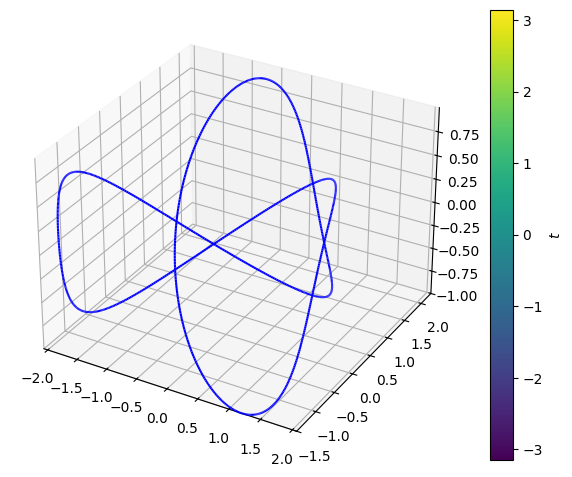

In [19]:
dtuplot.plot3d_parametric_line(
    *knude, (t, -pi, pi), rendering_kw={"color": "blue"}, legend=False
)

In [20]:
## OBS -- Dette integral tager meget lant tid for SymPy. Kan nemt tage mere end et minut, så vær tålmodig
#integrate(V.subs({x: knude[0], y: knude[1], z: knude[2]}).dot(knude.diff(t)), (t, -pi, pi))

Det arbejde som kraftfeltet $\pmb{V}$ bidrager med når partiklen kører en tur rundt i knuden er altså 0.
Ganske som forventet, da $\pmb{V}$ er et gradientvektorfelt.

## Fladeintegral af vektorfelter (Flux gennem flader)

Der er givet et vektorfelt ved:

In [21]:
x, y, z = symbols("x y z", real=True)
V = lambda x, y, z: Matrix([x, y, 2])
V(x, y, z)

⎡x⎤
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣2⎦

Vi betragter den del af standardparaboloiden $F_{parab}$, der ligger under planen $z=1$. Denne kan parametriseres ved:

In [22]:
u, v = symbols("u v", real=True)
r = Matrix([u * cos(v), u * sin(v), u**2])
r

⎡u⋅cos(v)⎤
⎢        ⎥
⎢u⋅sin(v)⎥
⎢        ⎥
⎢    2   ⎥
⎣   u    ⎦

hvor $u\in [0,1]$ og $v\in [-\pi,\pi]$. Vektorfeltet og fladen illustreres ved:

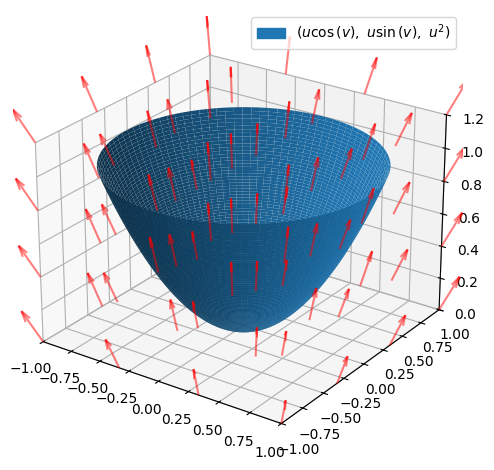

In [23]:
p_parab = dtuplot.plot3d_parametric_surface(
    *r,
    (u, 0, 1),
    (v, -pi, pi),
    use_cm=False,
    camera={"elev": 25, "azim": -55},
    show=False
)
p_felt = dtuplot.plot_vector(
    V(x, y, z),
    (x, -1, 1),
    (y, -1, 1),
    (z, 0, 1.2),
    n=4,
    use_cm=False,
    quiver_kw={"alpha": 0.5, "length": 0.1, "color": "red"},
    show=False,
)

(p_parab + p_felt).show()

Vi kan nøjes med at plotte vektorfeltet på selve fladen:

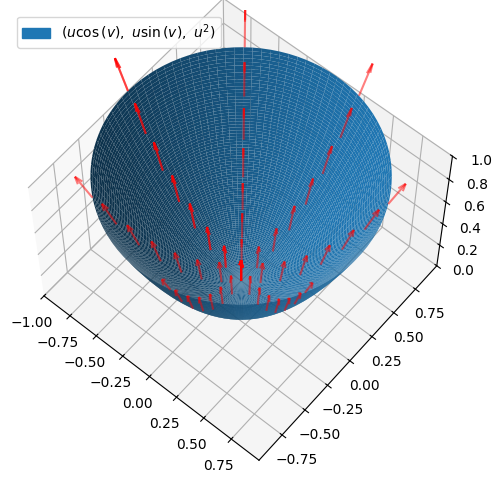

In [24]:
# Kommer vektorer fra alle hjørner. Der kommer for mange
# vektorer hvis "p_parab" bruges, så her sættes n ned
dummy_surface = dtuplot.plot3d_parametric_surface(
    *r, (u, 0, 1), (v, -pi, pi), n=8, show=False
)
p_felt2 = dtuplot.plot_vector(
    V(x, y, z),
    (x, -1, 1),
    (y, -1, 1),
    (z, 0, 1),
    slice=dummy_surface[0],
    use_cm=False,
    quiver_kw={"alpha": 0.5, "length": 0.1, "color": "red"},
    show=False,
)
# bedre kamera vinkel til at se vektorerne her
p_parab.camera = {"elev": 60, "azim": -50}

(p_parab + p_felt2).show()

### Beregning af flux "ned" gennem paraboloiden $F_{parab}$

Det ligner tydeligvis, at der er (positiv) flux op gennem fladen. Vi regner derfor med at finde at fluxen ned gennem fladen er negativ. Vi starter med at finde normalvektoren til parabloiden givet ved vores valgte parametrisering:

In [25]:
n_parab = r.diff(u).cross(r.diff(v))
simplify(n_parab)

⎡    2       ⎤
⎢-2⋅u ⋅cos(v)⎥
⎢            ⎥
⎢    2       ⎥
⎢-2⋅u ⋅sin(v)⎥
⎢            ⎥
⎣     u      ⎦

Læg her mærke til, at normalvektor $n$ peger i den forkerte retning (*ind imod* z-aksen og derfor med positiv $z$-koordinat) i forhold til at vi ønsker fluxen ned gennem fladen. Vi skal altså huske at skifte fortegn på normalvektoren $n_{parab}$:

In [26]:
n_parab = -simplify(n_parab)
n_parab

⎡   2       ⎤
⎢2⋅u ⋅cos(v)⎥
⎢           ⎥
⎢   2       ⎥
⎢2⋅u ⋅sin(v)⎥
⎢           ⎥
⎣    -u     ⎦

Længden er normalvektoren skal kun bruges til at argumentere for at parametriseringen er regulær:

In [27]:
n_parab.norm().simplify()

Dette udtryk er positivt på det indre af $\Gamma$, så det er den. Vi finder nu integranden:

In [28]:
integrand = n_parab.dot(V(*r))
simplify(integrand)

Hvormed fluxen udregnes ved

\begin{equation}
Flux(\pmb{V}, F_{parab}) = \int_0^1\int_{-\pi}^\pi \pmb{V}(r(u,v))\cdot n_{parab}\,\mathrm{d}u\,\mathrm{d}v
\end{equation}

In [29]:
integrate(integrand, (u, 0, 1), (v, -pi, pi))

Den ønskede flux er altså $-\pi$!

### Beregning af fluxen gennem parabloidens "låg" $F_{låg}$ i $z$-aksens (positive) retning

In [30]:
r2 = Matrix([u * cos(v), u * sin(v), 1])
n2 = r2.diff(u).cross(r2.diff(v))
simplify(n2)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣u⎦

Retningen på normalvektoren passer den ønskede retning gennem fladen $F_{låg}$.

In [31]:
integrand2 = n2.dot(V(*r2))
integrate(integrand2, (u, 0, 1), (v, -pi, pi))

Fluxen gennem låget er $Flux(\pmb{V},F_{låg}) = 2\pi$.

### Fluxen gennem den lukkede flade med parabloide og låg $F_{lukket} = F_{parab} \cup F_{låg}$

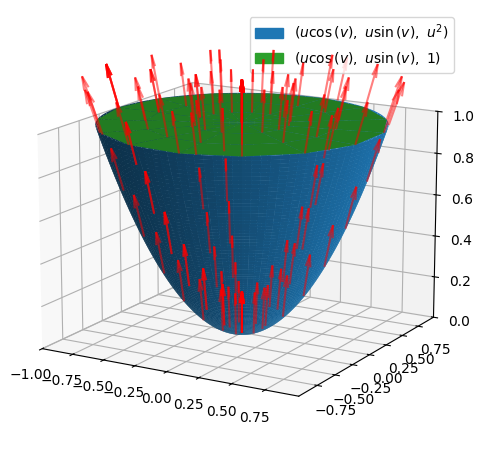

In [32]:
p_låg = dtuplot.plot3d_parametric_surface(
    *r2,
    (u, 0, 1),
    (v, -pi, pi),
    use_cm=False,
    n1=4,
    n2=16,
    camera={"elev": 25, "azim": -55},
    show=False
)
p_feltlåg = dtuplot.plot_vector(
    V(x, y, z),
    (x, -1, 1),
    (y, -1, 1),
    (z, 0, 1),
    slice=p_låg[0],
    use_cm=False,
    quiver_kw={"alpha": 0.5, "length": 0.1, "color": "red"},
    show=False,
)
p_parab.camera = {"elev": 15, "azim": -60}

(p_parab + p_felt2 + p_låg + p_feltlåg).show()

Vi behøver dog ikke at regne yderligere! Vi har nemlig fluxen gennem alle fladerne, hvorved den samlede flux gennem den lukkede flade er $Flux(\pmb{V},F_{lukket})=-\pi+2\pi=\pi$.

## Flux gennem et stykke af en kugleflade

Der er givet et vektorfelt,

In [33]:
x, y, z = symbols("x y z")
V = Matrix([-y + x, x, z])
V

⎡x - y⎤
⎢     ⎥
⎢  x  ⎥
⎢     ⎥
⎣  z  ⎦

og et udsnit af en kegleflade,

In [34]:
u, v, w = symbols("u v w", real=True)
radius = 2
r = radius * Matrix([sin(u) * cos(v), sin(u) * sin(v), cos(u)])
r

⎡2⋅sin(u)⋅cos(v)⎤
⎢               ⎥
⎢2⋅sin(u)⋅sin(v)⎥
⎢               ⎥
⎣   2⋅cos(u)    ⎦

med $u\in[\pi/6,\pi/2]$ og $v\in[0,\pi]$,

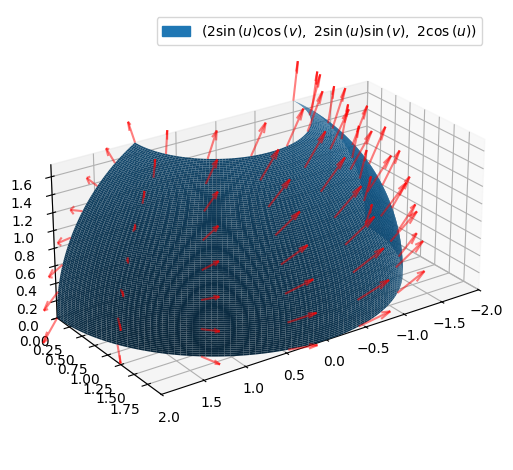

In [35]:
p_surface = dtuplot.plot3d_spherical(
    radius,
    (u, pi / 6, pi / 2),
    (v, 0, pi),
    aspect="equal",
    camera={"elev": 25, "azim": 55},
    show=False,
)
dummy_surface = dtuplot.plot3d_spherical(
    radius, (u, pi / 6, pi / 2), (v, 0, pi), show=False, n=8
)
p_felt = dtuplot.plot_vector(
    V,
    (x, -1, 1),
    (y, -1, 1),
    (z, 0, 1),
    slice=dummy_surface[0],
    use_cm=False,
    quiver_kw={"alpha": 0.5, "length": 0.2, "color": "red"},
    show=False,
)

(p_surface + p_felt).show()

Med fluxen udregnet til,

In [36]:
n = r.diff(u).cross(r.diff(v))
integrand = n.dot(V.subs({x: r[0], y: r[1], z: r[2]}))
integrate(integrand, (u, pi / 6, pi / 2), (v, 0, pi))

## Flux gennem et stykke af en kugleflade med Gauss (ikke-pensum)

Vi sammenligner resultatet fra fluxen udregnet med Gauss' sætning gennem en halvkugle med radius $a$ ($u\in[0,a]$, $v\in[0,\pi/2]$ og $w\in[-\pi,\pi]$), med fluxen gennem dens to overflader. Det skulle meget gerne være det samme!

In [37]:
V = Matrix([8 * x, 8, 4 * z**3])
r = u * Matrix([sin(v) * cos(w), sin(v) * sin(w), cos(v)])
V, r

⎛⎡8⋅x ⎤                   ⎞
⎜⎢    ⎥  ⎡u⋅sin(v)⋅cos(w)⎤⎟
⎜⎢ 8  ⎥  ⎢               ⎥⎟
⎜⎢    ⎥, ⎢u⋅sin(v)⋅sin(w)⎥⎟
⎜⎢   3⎥  ⎢               ⎥⎟
⎝⎣4⋅z ⎦  ⎣   u⋅cos(v)    ⎦⎠

Først ved Gauss' sætning,

In [38]:
a = symbols("a", real=True, positive=True)
M = Matrix.hstack(r.diff(u), r.diff(v), r.diff(w))
# determinanten er positiv. Eneste led der ikke er
# kvadreret er sin(v), som er positiv indenfor v's grænser
jacobi = M.det()
divV = dtutools.div(V, [x, y, z])
divV_r = divV.subs({x: r[0], y: r[1], z: r[2]})
integrate(divV_r * jacobi, (u, 0, a), (v, 0, pi / 2), (w, -pi, pi))

Og så gennem de to flader,

In [39]:
# Første flade tilsvarer at fastsætte u til radius
r1 = r.subs(u, a)
n1 = r1.diff(v).cross(r1.diff(w))  # har tjekket at den pejer udad
integrand1 = n1.dot(V.subs({x: r1[0], y: r1[1], z: r1[2]}))
flux1 = integrate(integrand1, (v, 0, pi / 2), (w, -pi, pi))
# Anden flade tilsvarer at fastsætte v til pi/2
# Tilbageværende bliver skiven med radius a
r2 = r.subs(v, pi / 2)
n2 = -r2.diff(u).cross(r2.diff(w))  # skal være negativ før at den pejer udad
integrand2 = n2.dot(V.subs({x: r2[0], y: r2[1], z: r2[2]}))
flux2 = integrate(integrand2, (u, 0, a), (w, -pi, pi))
flux1 + flux2

Som forventet!

## Flowkurver / Integralkurver

Vektorfelter kan også "bestemme" en partikels bevægelse i planen eller rummet (flowkurve). Vi forestiller os at vi til tiden $t=0$ smider en partikel ned i et kraftfelt i punktet $\pmb{x}_0$, og vi ønsker at modellere partiklens bane (kurve) $\pmb{r}(t)$ som funktion af tiden. Disse kurver kaldes for *integral-kurver* (og undertiden for flow-kurver). De er løsninger til differentialligningssystemet:

\begin{equation*}
  \pmb{r}'(t) = \pmb V(\pmb{r}(t)), \quad \pmb{r}(0) = \pmb{x}_0
\end{equation*}

hvor $\pmb{x}_0$ er begyndelsespunktet.

Vi betragter vektorfeltet

\begin{equation*}
  \pmb{V}(x,y) = \left[\begin{matrix}-\frac{1}{4}x + \frac{1}{2}y\\\frac{1}{2}x + \frac{1}{4}y\end{matrix}\right],
\end{equation*}

og to punkter, der angiver to partikler startpunkt $s_1$ og $s_2$ i vektorfeltet $V$

\begin{equation*}
  s_1 = (5, 0),\quad s_2 = (-3, \frac{1}{2}).
\end{equation*}

In [40]:
s1, s2 = Matrix([5, 0]), Matrix([-3, S(1)/2])

Kan vi nu finde flowkurverne disse to partikler. Vi angiver dem hhv. $r_1$ og $r_2$.

I dette tilfælde er differentialligningssystemet lineært, og vi kender løsningsmetoden fra Matematik 1a. Vi finder først systemmatricen:

\begin{equation*}
   A = \left[\begin{matrix}-\frac{1}{4} & \frac{1}{2}\\\frac{1}{2} & \frac{1}{4}\end{matrix}\right]
\end{equation*}

Og vi kan bruge egenværdierne og egenvektoerne for $A$ til at bestemme flowkurverne

In [41]:
A = Matrix(2, 2, [S("-1/4"), S("1/2"), S("1/2"), S("1/4")])
A.eigenvects(), A.diagonalize()

⎛                                                  ⎛                      ⎡-√5 ↪
⎜⎡⎛         ⎡⎡  √5   1⎤⎤⎞  ⎛       ⎡⎡  1   √5⎤⎤⎞⎤  ⎜⎡  √5   1    1   √5⎤  ⎢─── ↪
⎜⎢⎜-√5      ⎢⎢- ── - ─⎥⎥⎟  ⎜√5     ⎢⎢- ─ + ──⎥⎥⎟⎥  ⎜⎢- ── - ─  - ─ + ──⎥  ⎢ 4  ↪
⎜⎢⎜────, 1, ⎢⎢  2    2⎥⎥⎟, ⎜──, 1, ⎢⎢  2   2 ⎥⎥⎟⎥, ⎜⎢  2    2    2   2 ⎥, ⎢    ↪
⎜⎢⎜ 4       ⎢⎢        ⎥⎥⎟  ⎜4      ⎢⎢        ⎥⎥⎟⎥  ⎜⎢                  ⎥  ⎢    ↪
⎜⎣⎝         ⎣⎣   1    ⎦⎦⎠  ⎝       ⎣⎣   1    ⎦⎦⎠⎦  ⎜⎣   1         1    ⎦  ⎢ 0  ↪
⎝                                                  ⎝                      ⎣    ↪

↪      ⎤⎞⎞
↪ ─  0 ⎥⎟⎟
↪      ⎥⎟⎟
↪      ⎥⎟⎟
↪    √5⎥⎟⎟
↪    ──⎥⎟⎟
↪    4 ⎦⎠⎠

Både $\verb|A.eigenvects()|$ og $\verb|A.diagonalize()|$ giver det ønskede info, og hvilken man bruger er et preference spørgsmål.

### Med $\verb|A.eigenvects()|$:

In [42]:
k = symbols("k1:3")
ev = A.eigenvects()
ev

⎡⎛         ⎡⎡  √5   1⎤⎤⎞  ⎛       ⎡⎡  1   √5⎤⎤⎞⎤
⎢⎜-√5      ⎢⎢- ── - ─⎥⎥⎟  ⎜√5     ⎢⎢- ─ + ──⎥⎥⎟⎥
⎢⎜────, 1, ⎢⎢  2    2⎥⎥⎟, ⎜──, 1, ⎢⎢  2   2 ⎥⎥⎟⎥
⎢⎜ 4       ⎢⎢        ⎥⎥⎟  ⎜4      ⎢⎢        ⎥⎥⎟⎥
⎣⎝         ⎣⎣   1    ⎦⎦⎠  ⎝       ⎣⎣   1    ⎦⎦⎠⎦

Den generelle løsning stilles op som vi kender det fra systemer af førsteordens differentialligninger (med to forskellige egenværdier):

\begin{equation*}
  \boldsymbol r(u) = k_1 e^{{\lambda_1}u} \boldsymbol v_1 + k_2 e^{{\lambda_2}u} \boldsymbol v_2
\end{equation*}

In [43]:
r_generel = (
    k[0] * exp(ev[0][0] * u) * ev[0][-1][0] + k[1] * exp(ev[1][0] * u) * ev[1][-1][0]
)
r_generel

⎡               -√5⋅u                   √5⋅u⎤
⎢               ──────                  ────⎥
⎢   ⎛  √5   1⎞    4         ⎛  1   √5⎞   4  ⎥
⎢k₁⋅⎜- ── - ─⎟⋅ℯ       + k₂⋅⎜- ─ + ──⎟⋅ℯ    ⎥
⎢   ⎝  2    2⎠              ⎝  2   2 ⎠      ⎥
⎢                                           ⎥
⎢               -√5⋅u        √5⋅u           ⎥
⎢               ──────       ────           ⎥
⎢                 4           4             ⎥
⎣           k₁⋅ℯ       + k₂⋅ℯ               ⎦

De angivne startpunkter er vores startbetingelser og ligningerne

\begin{equation*}
  \boldsymbol r_1(0) = s_1\quad \text{og}\quad \boldsymbol r_1(0) = s_2
\end{equation*}

løses for at finde vores specifikke flowkurver

In [44]:
ks_r1 = solve(r_generel.subs(u, 0) - s1)
ks_r2 = solve(r_generel.subs(u, 0) - s2)
ks_r1, ks_r2

Disse kan substitueres direkte ind i $\boldsymbol r(u)$

In [45]:
r1 = r_generel.subs(ks_r1)
r2 = r_generel.subs(ks_r2)

og vi får flowkurverne

In [46]:
r1, r2

⎛⎡               √5⋅u                  -√5⋅u ⎤  ⎡                        √5⋅u  ↪
⎜⎢               ────                  ──────⎥  ⎢                        ────  ↪
⎜⎢   ⎛  1   √5⎞   4        ⎛  √5   1⎞    4   ⎥  ⎢⎛  1   √5⎞ ⎛1   11⋅√5⎞   4    ↪
⎜⎢√5⋅⎜- ─ + ──⎟⋅ℯ     - √5⋅⎜- ── - ─⎟⋅ℯ      ⎥  ⎢⎜- ─ + ──⎟⋅⎜─ - ─────⎟⋅ℯ      ↪
⎜⎢   ⎝  2   2 ⎠            ⎝  2    2⎠        ⎥  ⎢⎝  2   2 ⎠ ⎝4    20  ⎠        ↪
⎜⎢                                           ⎥, ⎢                              ↪
⎜⎢               √5⋅u       -√5⋅u            ⎥  ⎢                        √5⋅u  ↪
⎜⎢               ────       ──────           ⎥  ⎢                        ────  ↪
⎜⎢                4           4              ⎥  ⎢           ⎛1   11⋅√5⎞   4    ↪
⎜⎣           √5⋅ℯ     - √5⋅ℯ                 ⎦  ⎢           ⎜─ - ─────⎟⋅ℯ      ↪
⎝                                               ⎣           ⎝4    20  ⎠        ↪

↪                           -√5⋅u ⎤⎞
↪                           ──────⎥⎟
↪   ⎛1   11⋅√5⎞ ⎛  √5   1⎞    4   

No ranges were provided. This function will attempt to find them, however the order will be arbitrary, which means the visualization might be flipped.

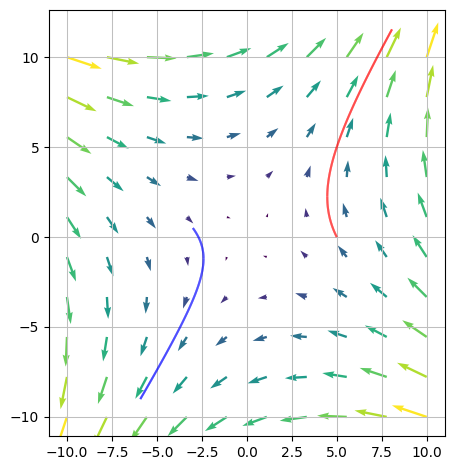

In [47]:
v_felt = dtuplot.plot_vector(
    A * Matrix([x, y]),
    n=10,
    scalar=False,
    colorbar=False,
    quiver_kw={"color": "black"},
    show=False,
)
r1_plot = dtuplot.plot_parametric(
    *r1, [u, 0, 3], rendering_kw={"color": "red"}, colorbar=False, show=False
)
r2_plot = dtuplot.plot_parametric(
    *r2, (u, 0, 4), rendering_kw={"color": "blue"}, colorbar=False, show=False
)
(v_felt + r1_plot + r2_plot).show()

### Løsning via $\verb|A.diagonalize()|$:

In [48]:
k = symbols("k1:3")
matrix_of_evs, LAMBDA = A.diagonalize()
matrix_of_evs, LAMBDA

⎛                      ⎡-√5     ⎤⎞
⎜⎡  √5   1    1   √5⎤  ⎢────  0 ⎥⎟
⎜⎢- ── - ─  - ─ + ──⎥  ⎢ 4      ⎥⎟
⎜⎢  2    2    2   2 ⎥, ⎢        ⎥⎟
⎜⎢                  ⎥  ⎢      √5⎥⎟
⎜⎣   1         1    ⎦  ⎢ 0    ──⎥⎟
⎝                      ⎣      4 ⎦⎠

In [49]:
r_generel = k[0] * exp(LAMBDA[0, 0] * u) * matrix_of_evs.col(0) + k[1] * exp(
    LAMBDA[1, 1] * u
) * matrix_of_evs.col(1)
r_generel

⎡               -√5⋅u                   √5⋅u⎤
⎢               ──────                  ────⎥
⎢   ⎛  √5   1⎞    4         ⎛  1   √5⎞   4  ⎥
⎢k₁⋅⎜- ── - ─⎟⋅ℯ       + k₂⋅⎜- ─ + ──⎟⋅ℯ    ⎥
⎢   ⎝  2    2⎠              ⎝  2   2 ⎠      ⎥
⎢                                           ⎥
⎢               -√5⋅u        √5⋅u           ⎥
⎢               ──────       ────           ⎥
⎢                 4           4             ⎥
⎣           k₁⋅ℯ       + k₂⋅ℯ               ⎦

In [50]:
eq_k_r1 = Eq
ks_r1 = solve(r_generel.subs(u, 0) - s1)
ks_r2 = solve(r_generel.subs(u, 0) - s2)
ks_r1, ks_r2

og vi får samme flowkurver som ovenfor

In [51]:
r1 = r_generel.subs(ks_r1)
r2 = r_generel.subs(ks_r2)
r1, r2

⎛⎡               √5⋅u                  -√5⋅u ⎤  ⎡                        √5⋅u  ↪
⎜⎢               ────                  ──────⎥  ⎢                        ────  ↪
⎜⎢   ⎛  1   √5⎞   4        ⎛  √5   1⎞    4   ⎥  ⎢⎛  1   √5⎞ ⎛1   11⋅√5⎞   4    ↪
⎜⎢√5⋅⎜- ─ + ──⎟⋅ℯ     - √5⋅⎜- ── - ─⎟⋅ℯ      ⎥  ⎢⎜- ─ + ──⎟⋅⎜─ - ─────⎟⋅ℯ      ↪
⎜⎢   ⎝  2   2 ⎠            ⎝  2    2⎠        ⎥  ⎢⎝  2   2 ⎠ ⎝4    20  ⎠        ↪
⎜⎢                                           ⎥, ⎢                              ↪
⎜⎢               √5⋅u       -√5⋅u            ⎥  ⎢                        √5⋅u  ↪
⎜⎢               ────       ──────           ⎥  ⎢                        ────  ↪
⎜⎢                4           4              ⎥  ⎢           ⎛1   11⋅√5⎞   4    ↪
⎜⎣           √5⋅ℯ     - √5⋅ℯ                 ⎦  ⎢           ⎜─ - ─────⎟⋅ℯ      ↪
⎝                                               ⎣           ⎝4    20  ⎠        ↪

↪                           -√5⋅u ⎤⎞
↪                           ──────⎥⎟
↪   ⎛1   11⋅√5⎞ ⎛  √5   1⎞    4   

## Et eksempel med Gauss-sætningen (ikke pensum)

Givet vektorfeltet

In [52]:
V = Matrix([-x + cos(z), -y * x, 3 * z + exp(y)])
V

⎡-x + cos(z)⎤
⎢           ⎥
⎢   -x⋅y    ⎥
⎢           ⎥
⎢        y  ⎥
⎣ 3⋅z + ℯ   ⎦

Samt den rummelige mængde $\Omega$ bestemt ved 
\begin{equation*}
\bigl\{(x,y,z) \in \mathbb{R}^3 : x\in[0,3], \, y\in[0,2], \,z\in[0,y^2] \bigr\}
\end{equation*} 
Her er mængden illustreret:

In [53]:
a = symbols("a")
# Da man ikke kan plotte et 3D volumen (nemt), plotter vi overfladerne,
p = dtuplot.plot3d_parametric_surface(
    x,
    y,
    y**2,
    (x, 0, 3),
    (y, 0, 2),
    {"color": "royalblue"},
    use_cm=False,
    aspect="equal",
    show=False,
)
p.extend(
    dtuplot.plot3d_parametric_surface(
        0,
        y,
        a * y**2,
        (a, 0, 1),
        (y, 0, 2),
        {"color": "royalblue", "alpha": 0.5},
        use_cm=False,
        aspect="equal",
        show=False,
    )
)
p.extend(
    dtuplot.plot3d_parametric_surface(
        3,
        y,
        a * y**2,
        (a, 0, 1),
        (y, 0, 2),
        {"color": "royalblue", "alpha": 0.5},
        use_cm=False,
        aspect="equal",
        show=False,
    )
)
p.extend(
    dtuplot.plot3d_parametric_surface(
        x,
        2,
        a * 4,
        (x, 0, 3),
        (a, 0, 1),
        {"color": "royalblue", "alpha": 0.5},
        use_cm=False,
        aspect="equal",
        show=False,
    )
)
p.extend(
    dtuplot.plot3d_parametric_surface(
        x,
        y,
        0,
        (x, 0, 3),
        (y, 0, 2),
        {"color": "royalblue", "alpha": 0.5},
        use_cm=False,
        aspect="equal",
        show=False,
    )
)
p_felt = dtuplot.plot_vector(
    V,
    (x, 0, 3),
    (y, 0, 2),
    (z, 0, 4),
    n=4,
    use_cm=False,
    quiver_kw={"alpha": 0.5, "length": 0.05, "color": "red"},
    show=False,
)

(p + p_felt).show()

Vi vil nu bestemme fluxen af vektorfeltet $\pmb{V}$ ud gennem den lukkede overflade af $\Omega$ ved brug af gauss sætning!

Først finder vi parameterfremstillingen for det massive volumen,

In [ ]:
u, v, w = symbols("u v w")
r = Matrix([u, v, w * v**2])
r

In [ ]:
M = Matrix.hstack(r.diff(u), r.diff(v), r.diff(w))
M, det(M)

Vi kan tage determinanten, da
\begin{equation*}
(r_u'(u,v,w)\times r_v'(u,v,w))\cdot r_w'(u,v,w)=\det\begin{bmatrix}|&|&|\\r_u'(u,v,w)&r_v'(u,v,w)&r_w'(u,v,w)\\|&|&|\end{bmatrix}.
\end{equation*}

Vi skal dog stadig tage absolut-værdien (se Definition 25.19). Dog kan man som regel få flottere udtryk at lade være med at tage absolutværdien, hvis man kan garantere at determinanten altid er positiv. Det er den i dette tilfælde, da $v>0$, så

In [ ]:
jacobian = M.det()
jacobian

Divergensen bliver nu

In [ ]:
divV = dtutools.div(V, (x, y, z))
divV

Divergensen begrænset til det parameteriserede område fåes altså til,

In [ ]:
divV_r = divV.subs({x: r[0], y: r[1], z: r[2]})
divV_r

Da

In [ ]:
integrate(divV_r * jacobi, (u, 0, 3), (v, 0, 2), (w, 0, 1))

får af Gauss' sætning nu:

\begin{equation}
\int_{\delta\Omega}\pmb{V}\cdot \mathrm{d}\pmb{S} = \int_0^1\int_0^2\int_0^3(2-u)\cdot v^2\,\mathrm{d}u\,\mathrm{d}v\,\mathrm{d}w = 4
\end{equation}

I dette eksempel er det særligt oplagt at benytte Gauss' sætning, da vi både slipper for at udregne fluxen gennem $5$ sideflader, hvorefter vi vil skulle ligge delresultaterne sammen, og da divergensen er matematisk simpel i forhold til sit vektorfelt. Dette skal dog vurderes hver gang en ny opgave stilles!